# HR Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Understanding

In [76]:
hrdata = pd.read_csv('HRDataset_v14.csv')
hrdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Wallace, Courtney E",10274,1,1,0,5,5,3,1,80512,...,Janet King,2.0,Diversity Job Fair,Fully Meets,4.50,3,0,02/01/2012,0,5
1,"Homberger, Adrienne J",10195,1,1,0,5,5,3,0,63478,...,Michael Albert,30.0,Indeed,Fully Meets,3.03,5,0,05/03/2012,0,16
2,"Robertson, Peter",10224,1,1,1,5,5,3,0,55578,...,Kissy Sullivan,20.0,Indeed,Fully Meets,4.20,5,0,06/01/2012,0,13
3,"Huynh, Ming",10160,0,2,0,5,5,3,0,68182,...,Amy Dunn,11.0,Google Search,Fully Meets,3.72,3,0,01/02/2013,0,18
4,"Tavares, Desiree",10221,1,1,0,5,5,3,1,60754,...,Webster Butler,39.0,Diversity Job Fair,Fully Meets,4.50,5,0,02/15/2012,0,11


In [54]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Data PreProcessing

### Handle Missing Values

In [77]:
# Check for missing values
hrdata.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [78]:
# Fill missing DateofTermination with a placeholder
current_date = pd.Timestamp(datetime.now())
# Replace missing termination dates with the current date
hrdata['DateofTermination'].fillna(current_date, inplace=True)

# Fill missing ManagerID with a placeholder
hrdata['ManagerID'] = hrdata['ManagerID'].fillna(0)

### Convert Date Columns to Datetime
- Converting DOB, DateofHire, DateofTermination, and LastPerformanceReview_Date to datetime objects.

In [79]:
# Convert date columns to datetime and infer formats
hrdata['DOB'] = pd.to_datetime(hrdata['DOB'])
hrdata['DateofHire'] = pd.to_datetime(hrdata['DateofHire'])
hrdata['DateofTermination'] = pd.to_datetime(hrdata['DateofTermination'])
hrdata['LastPerformanceReview_Date'] = pd.to_datetime(hrdata['LastPerformanceReview_Date'])

### Checking outliers

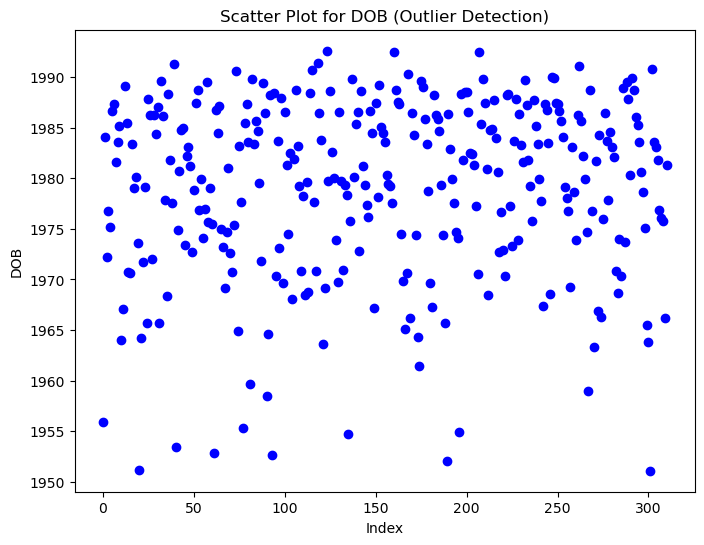

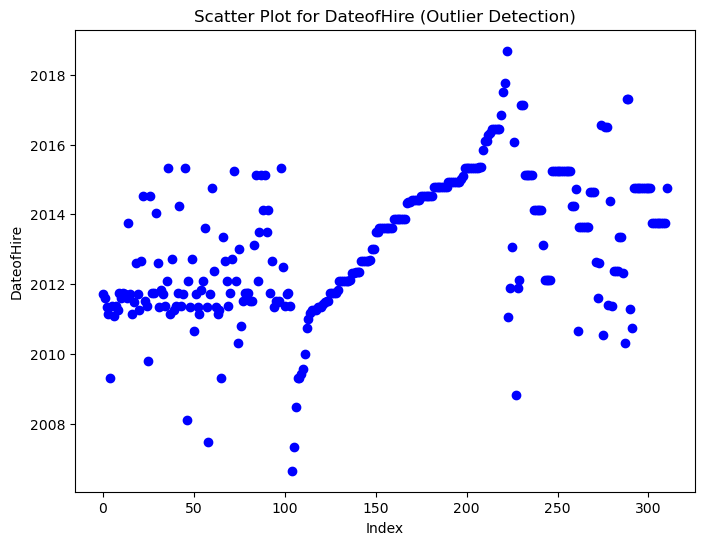

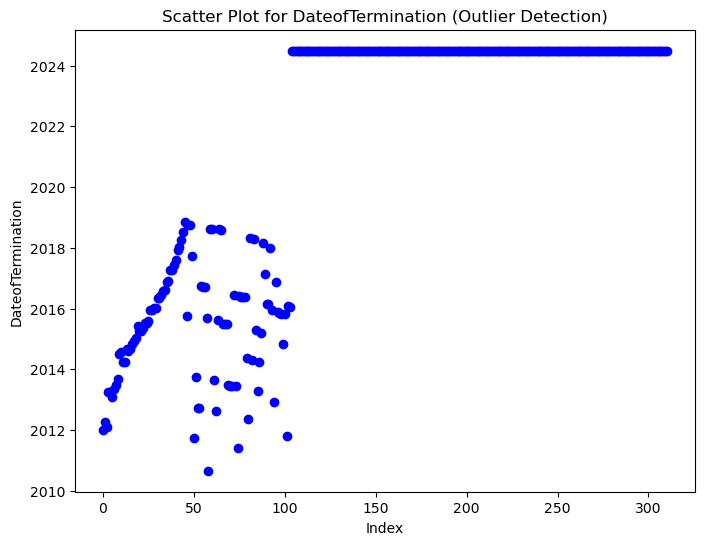

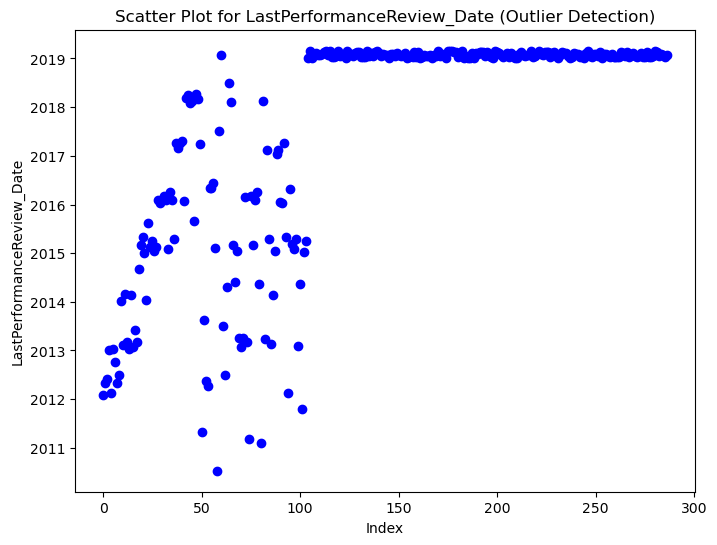

In [61]:
for column in hrdata.columns:
    if hrdata[column].dtype == 'datetime64[ns]':  # Check if the column contains dates
        plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
        plt.plot(hrdata[column], 'bo')  # 'bo' for blue circles
        plt.title(f'Scatter Plot for {column} (Outlier Detection)')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()

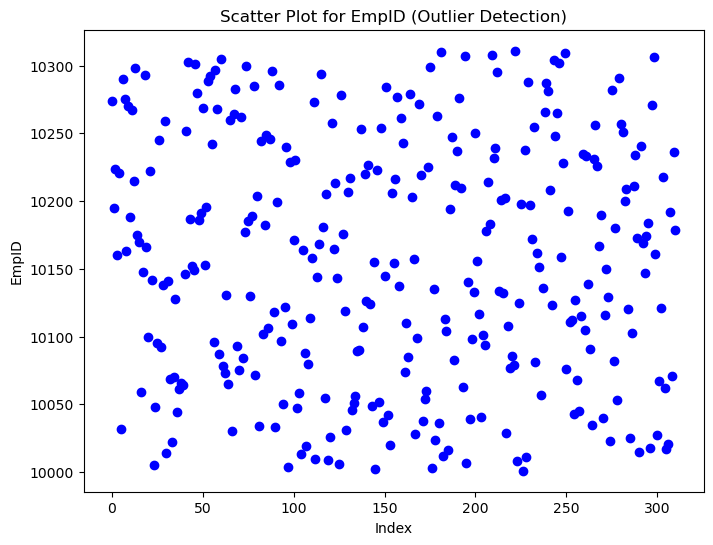

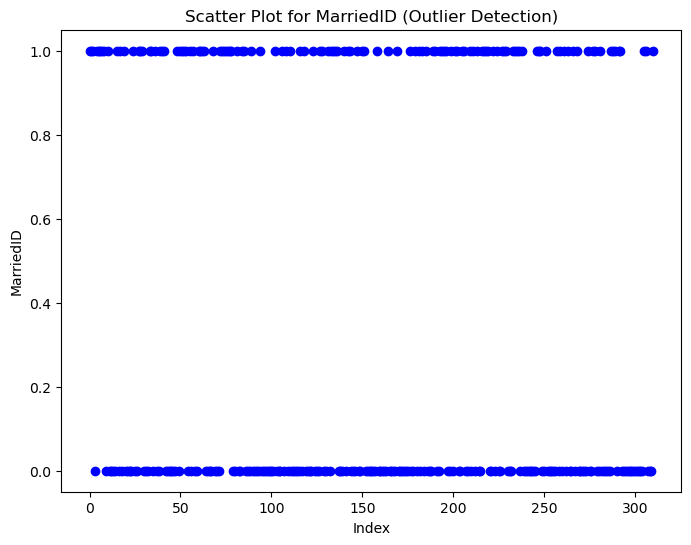

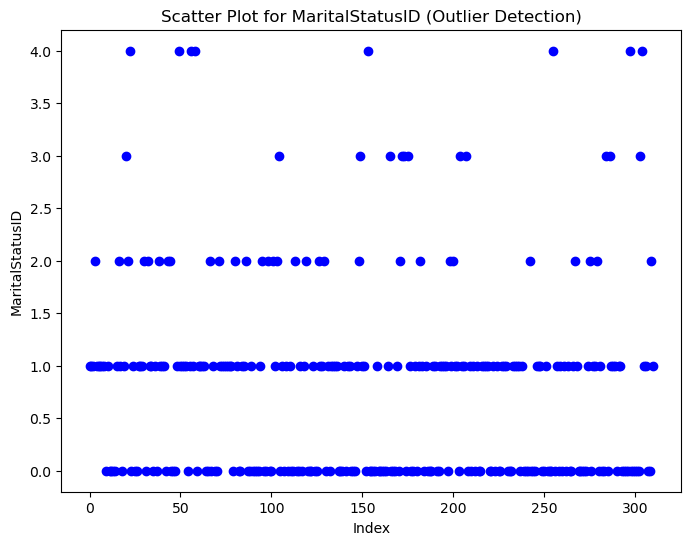

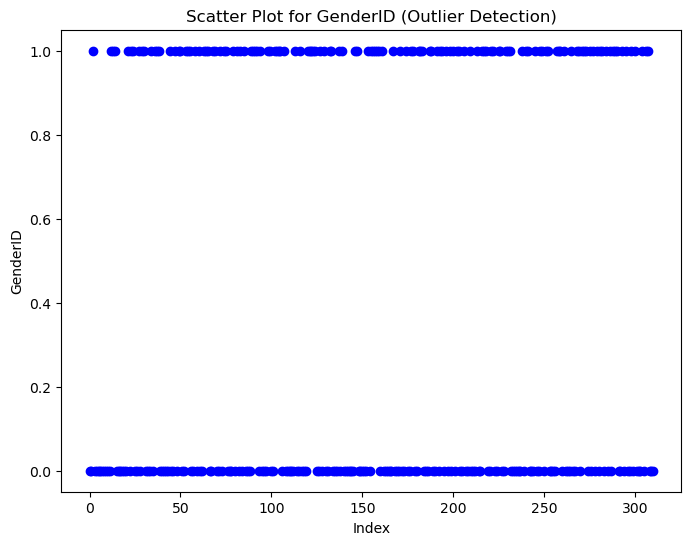

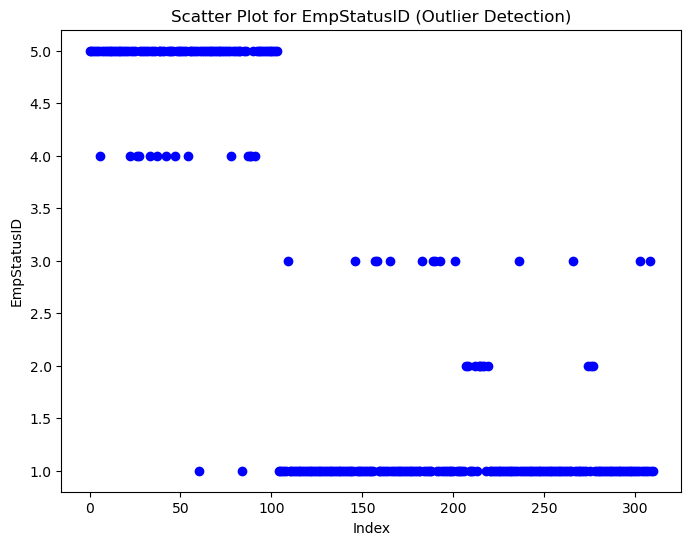

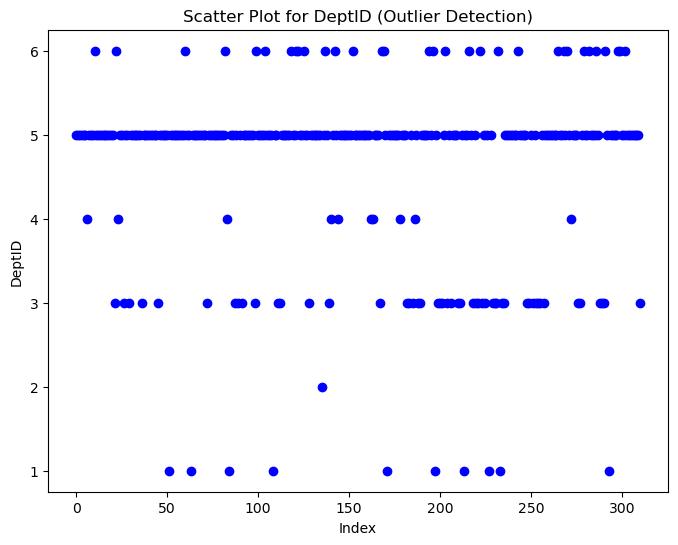

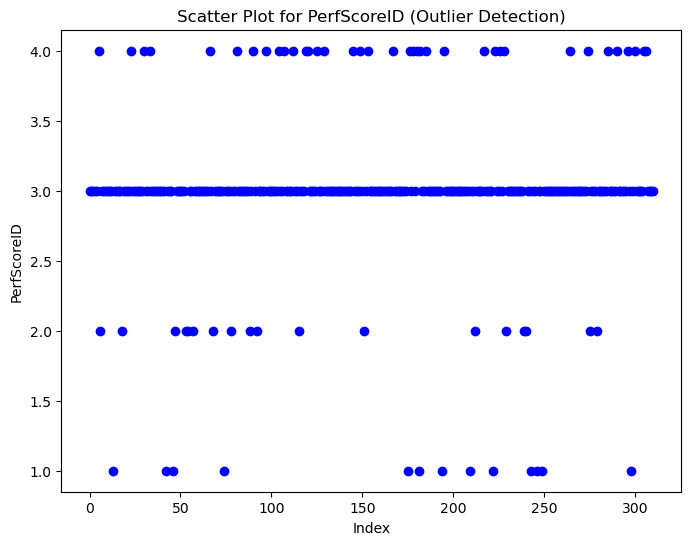

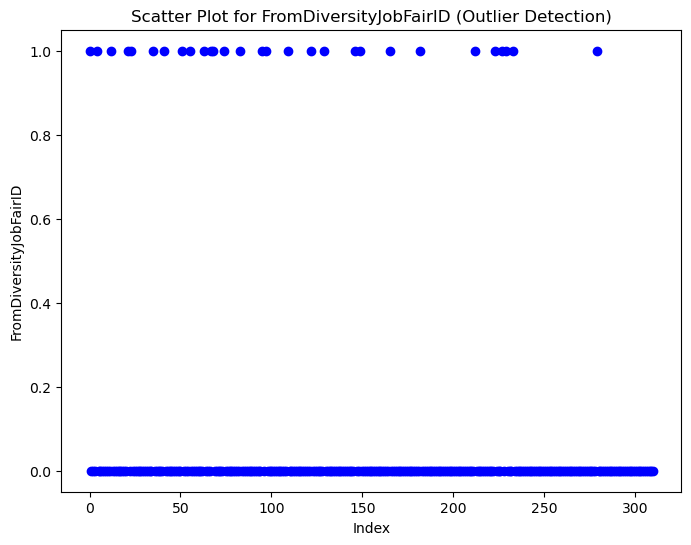

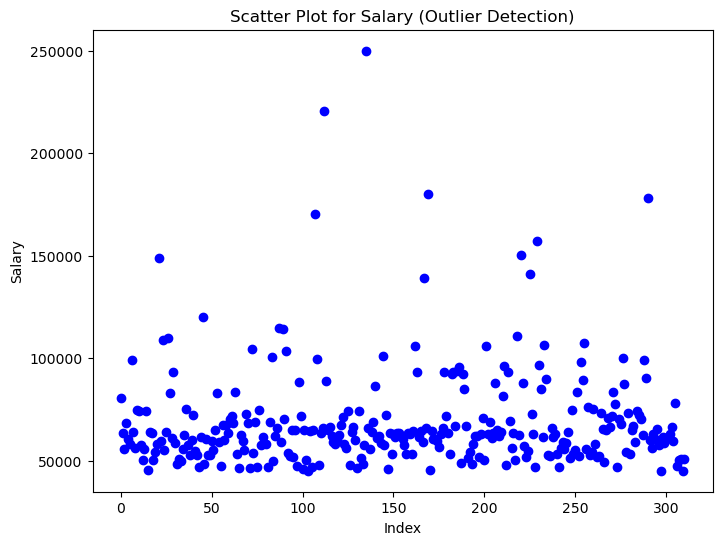

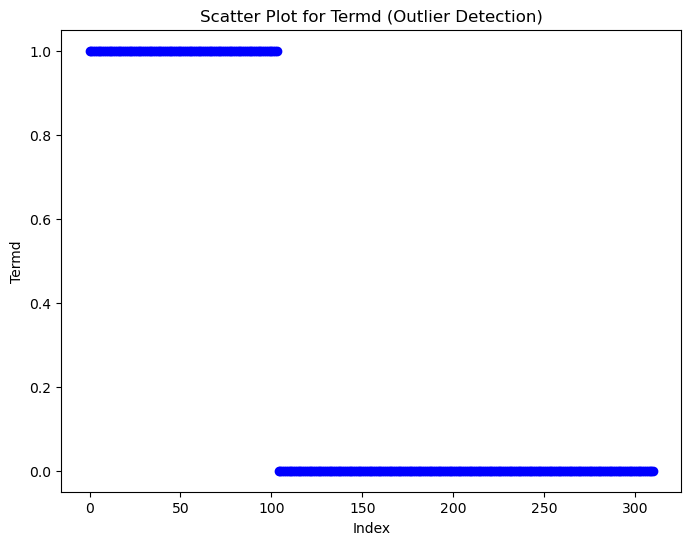

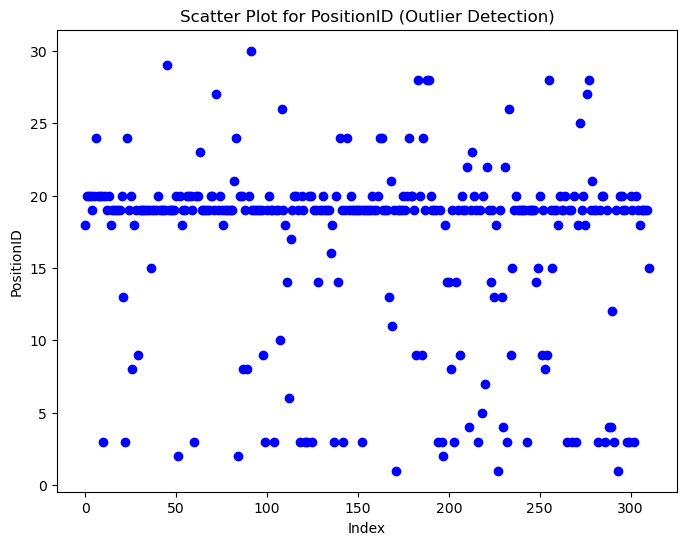

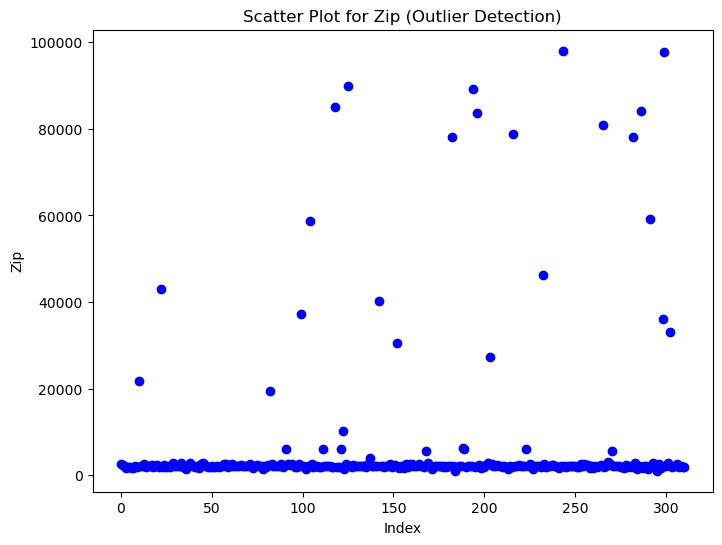

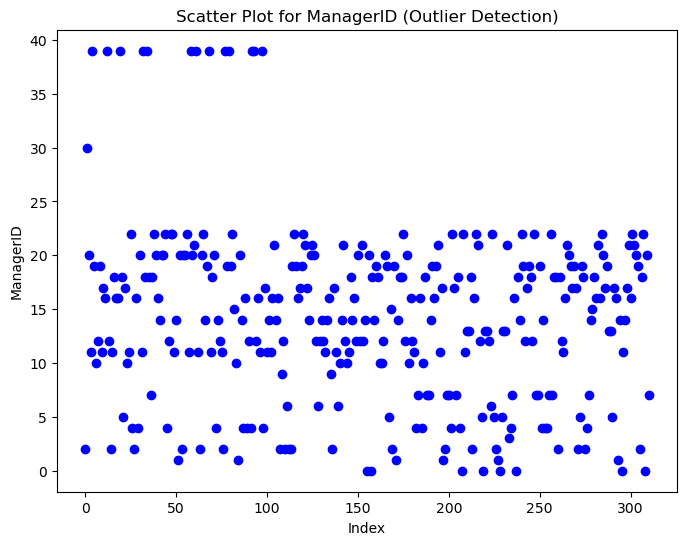

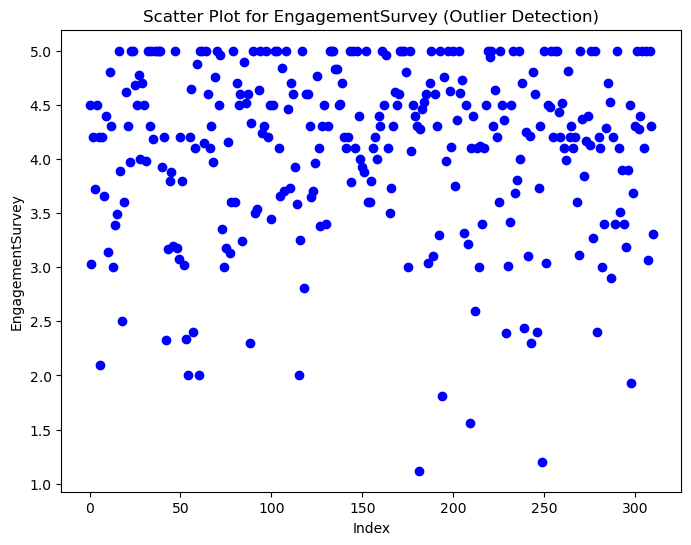

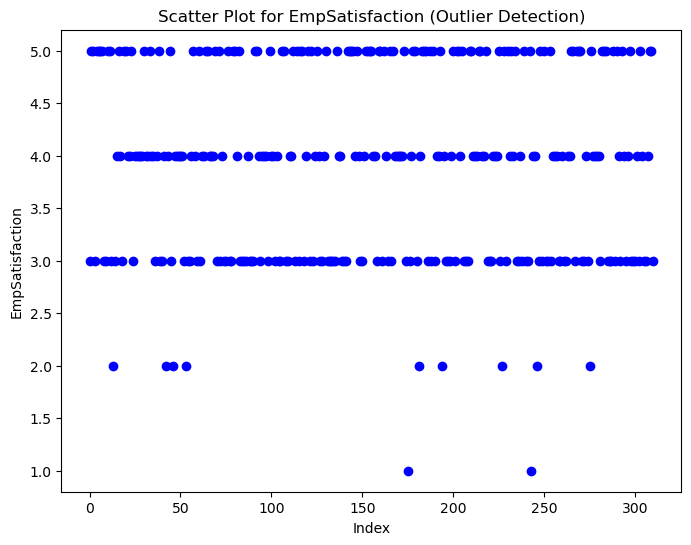

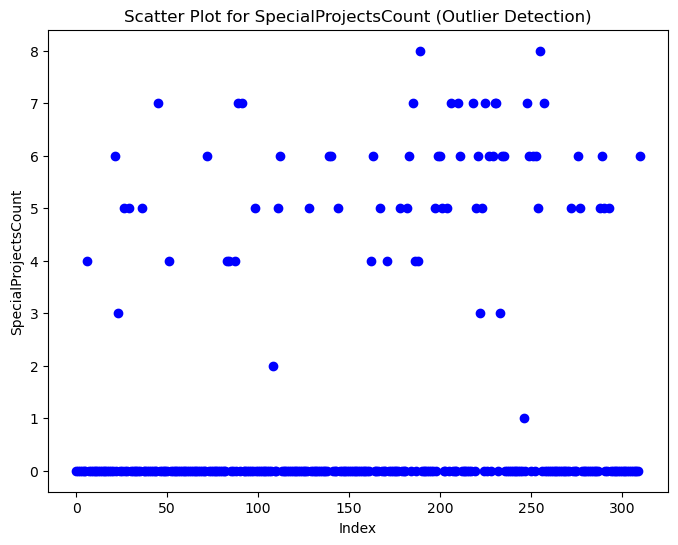

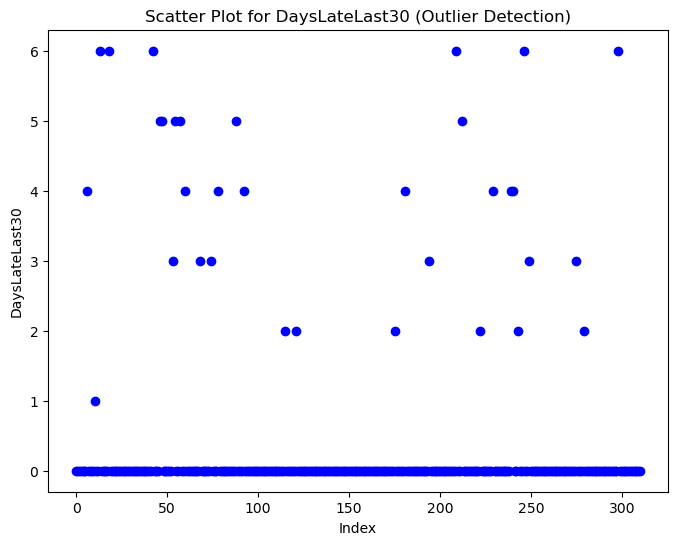

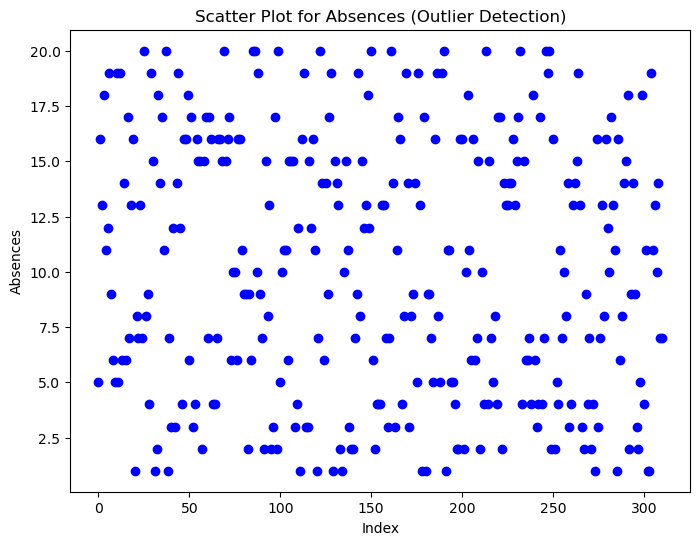

In [62]:
for column in hrdata.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.plot(hrdata[column], 'bo')  # 'bo' for blue circles
    plt.title(f'Scatter Plot for {column} (Outlier Detection)')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

### Feature Engineering

In [80]:
# Calculate age
hrdata['Age'] = ((datetime.now() - hrdata['DOB']).dt.days / 365.25).astype(int)

In [83]:
# Calculate tenure (Number of days employed) and convert to years
hrdata['days_employed'] = ((hrdata['DateofTermination'] - hrdata['DateofHire']).dt.days / 365.25).astype(int)

In [93]:
# Distribution of age groups
# Define age group bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Adding 0 and 100 to cover all possible ages
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create AgeGroup column
hrdata['AgeGroup'] = pd.cut(hrdata['Age'], bins=bins, labels=labels, right=False)

### Handling Categorical Variable

In [94]:
# Convert to category type
categorical_cols = ['MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'Sex', 'State', 'Position', 'TermReason','AgeGroup']
for col in categorical_cols:
    hrdata[col] = hrdata[col].astype('category')

### Standardizing Columns for Consistency

In [95]:
# Standardize column names
hrdata1=hrdata.copy()
hrdata1.columns = hrdata.columns.str.strip().str.lower().str.replace(' ', '_')

### Finalizing

In [96]:
# Check data types
hrdata1.dtypes

employee_name                         object
empid                                  int64
marriedid                              int64
maritalstatusid                        int64
genderid                               int64
empstatusid                            int64
deptid                                 int64
perfscoreid                            int64
fromdiversityjobfairid                 int64
salary                                 int64
termd                                  int64
positionid                             int64
position                            category
state                               category
zip                                    int64
dob                           datetime64[ns]
sex                                 category
maritaldesc                         category
citizendesc                         category
hispaniclatino                      category
racedesc                            category
dateofhire                    datetime64[ns]
dateofterm

In [ ]:
# Get all numerical columns dynamically
#numerical_columns = hrdata.select_dtypes(include=['number']).columns.tolist()

# Fill NaN values in numerical columns with 0
#hrdata[numerical_columns] = hrdata[numerical_columns].fillna(0)

In [97]:
# Export cleaned data
hrdata1.to_csv('cleaned_hr_dataset.csv', index=False)

In [98]:
hrdata.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,days_employed
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311,311.000000,311.000000,311.000000,311.000000,287,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,...,2021-06-22 05:54:23.761334528,14.196141,4.110000,3.890675,1.218650,2017-08-01 00:00:00,0.414791,10.237942,44.858521,7.819936
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,...,2010-08-30 00:00:00,0.000000,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000,31.000000,0.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,...,2016-09-17 00:00:00,9.500000,3.690000,3.000000,0.000000,2016-02-02 00:00:00,0.000000,5.000000,38.000000,4.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,...,2024-06-27 02:02:00.916787968,14.000000,4.280000,4.000000,0.000000,2019-01-14 00:00:00,0.000000,10.000000,43.000000,9.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,...,2024-06-27 02:02:00.916787968,19.000000,4.700000,5.000000,0.000000,2019-02-01 00:00:00,0.000000,15.000000,50.000000,10.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,...,2024-06-27 02:02:00.916788,39.000000,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000,73.000000,17.000000
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,...,NaN,8.301386,0.789938,0.909241,2.349421,NaN,1.294519,5.852596,8.870716,3.983804


## Data Analysis

### Employee Demographics Analysis

In [103]:
# Count of employees by gender
hrdata['Sex'].value_counts()

Sex
F     176
M     135
Name: count, dtype: int64

In [104]:
# Count of employees by marital status
hrdata['MaritalDesc'].value_counts()

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

In [105]:
# Distribution of age groups
hrdata['AgeGroup'].value_counts()

AgeGroup
40-49    122
30-39    105
50-59     64
60-69     14
70+        6
<20        0
20-29      0
Name: count, dtype: int64

**Key Insights:**

*Dominant Age Groups:*
- The majority of employees are in the 40-49 age group (122 employees), followed by the 30-39 age group (105 employees). These two groups together make up a significant portion of the workforce.
- The 50-59 age group is also notable, with 64 employees, indicating a considerable number of employees nearing retirement age.
  
*Older Workforce:*
- There are 14 employees in the 60-69 age group and 6 employees in the 70+ age group. This indicates that there are employees who are either at or beyond traditional retirement age, suggesting possible trends of delayed retirement or valuable retention of experienced staff.
*Lack of Younger Employees:*
- There are no employees in the <20 or 20-29 age groups. This could suggest a gap in hiring younger, possibly entry-level talent or recent graduates. This might impact the organization's future talent pipeline and succession planning.


**Recommendations:**
- Talent Acquisition and Succession Planning: Recruit Younger Employees: Develop strategies to attract younger talent, such as partnerships with universities, internships, and entry-level positions. This will help create a balanced age distribution and ensure the organization's long-term sustainability.
- Succession Planning: With a significant portion of the workforce in the 40-59 age range, it's essential to implement succession planning to prepare for retirements and ensure continuity in key roles.
- Employee Retention Programs: Retain Experienced Employees: For employees in the 50-59 and 60+ age groups, consider flexible working arrangements, phased retirement options, and knowledge transfer programs to retain their expertise while planning for future transitions.
- Diversity and Inclusion Initiatives: Promote age diversity by creating an inclusive workplace that values contributions from all age groups. Tailor development programs to meet the needs of different age groups, ensuring that all employees feel valued and supported.
- Engagement and Training: Engagement Programs: Implement targeted engagement programs to keep employees in the 40-49 and 50-59 age groups motivated and productive. This could include career development opportunities, wellness programs, and recognition initiatives.
- Training and Development: Provide ongoing training and development opportunities to upskill employees, especially those nearing retirement age, to keep them engaged and contributing effectively.
- Workforce Analytics: Continuously monitor and analyze workforce demographics to identify trends and adjust recruitment, retention, and development strategies accordingly. This proactive approach will help maintain a balanced and effective workforce.

### Salary Analysis

In [110]:
# Salary distribution by department
hrdata.groupby('Department', observed=False)['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Admin Offices,9.0,71791.888889,21706.397164,49920.0,55000.00,63003.0,93046.0,106367.0
Executive Office,1.0,250000.000000,NaN,250000.0,250000.00,250000.0,250000.0,250000.0
IT/IS,50.0,97064.640000,33209.612190,50178.0,77417.75,92328.5,106844.5,220450.0
Production,209.0,59953.545455,11422.656822,45046.0,53018.00,59472.0,64066.0,170500.0
Sales,31.0,69061.258065,21271.393236,55875.0,61561.50,65310.0,70506.5,180000.0
Software Engineering,11.0,94989.454545,9566.505698,77692.0,89601.50,95660.0,100807.5,108987.0


In [108]:
# Salary disparity analysis by sex and race
hrdata.groupby(['RaceDesc', 'Sex'], observed=False)['Salary'].mean()

RaceDesc                          Sex
American Indian or Alaska Native  F      63436.500000
                                  M      70545.000000
Asian                             F      67520.117647
                                  M      69939.416667
Black or African American         F      66963.829787
                                  M      85066.121212
Hispanic                          F               NaN
                                  M      83667.000000
Two or more races                 F      58068.500000
                                  M      62313.800000
White                             F      68846.519231
                                  M      65334.132530
Name: Salary, dtype: float64

**Key Observations:**
- Highest Mean Salary: The Executive Office has the highest mean salary at 250,000, but this is based on a single data point.
- High Salaries in IT/IS and Software Engineering: Both IT/IS (97,064.64) and Software Engineering (94,989.45) departments have high mean salaries compared to other departments.
- Lower Salaries in Production: The Production department has the lowest mean salary at 59,953.55 with a smaller spread, indicating relatively lower but more consistent salaries.
- Sales and Admin Offices: Both departments have intermediate mean salaries but show significant variation within each department.

*Gender Disparities:*
- In most racial groups, males tend to earn more than females. For example, Black or African American males earn 85,066.12 on average, compared to 66,963.83 for females. **An exception is observed in the White racial group, where females earn more (68,846.52) compared to males (65,334.13).**
- Racial Disparities: Among males, Black or African American and Hispanic employees have the highest average salaries (85,066.12 and 83,667.00, respectively).
- Among females, the highest average salary is found in the American Indian or Alaska Native group ($63,436.50), with no data available for Hispanic females.

**Recommendations:**
- Address Gender Pay Gap: Conduct a detailed review of salary policies and practices to identify and address the root causes of gender-based pay disparities. Implement transparent and fair pay structures. **Promote gender diversity in higher-paying roles and ensure equal opportunities for promotions and salary increases.**
- Promote Racial Pay Equity: Investigate the reasons behind the pay disparities across different racial groups. Provide training and development opportunities to underrepresented groups to promote career advancement. **Develop targeted initiatives to support higher-paying roles for minorities, ensuring equitable pay practices.**
- Regular Salary Audits: Conduct regular salary audits to monitor and address pay disparities. Use these audits to make data-driven decisions and adjustments to salary structures.
- Enhance Employee Support Programs: Implement programs aimed at supporting underrepresented groups, such as mentorship, sponsorship, and leadership development programs.
- Transparency and Communication: Increase transparency around salary structures and ensure clear communication with employees about how salaries are determined and adjusted.

### Employee Turnover Analysis

In [29]:
hrdata['Termd'].value_counts()

Termd
0    207
1    104
Name: count, dtype: int64

**Key Insights:**
- A total of 311 employees are represented in the dataset.
- Out of these, 207 employees (66.6%) are currently employed, while 104 employees (33.4%) have been terminated.
- The termination rate is 33.4%. This indicates that approximately one-third of the employees in the dataset have been terminated. *Understanding the reasons behind terminations is crucial for retention strategies.*
- The majority of employees (66.6%) remain employed, suggesting a relatively stable employment environment.

**Recommendations:**

- Analyze Termination Reasons: Investigate the reasons behind the terminations. Understanding whether terminations are due to performance issues, voluntary resignations, layoffs, or other factors can provide deeper insights into the workforce dynamics and help in developing strategies to reduce the termination rate.
- Employee Retention Strategies: Implement and enhance retention strategies to reduce the termination rate. This can include improving employee engagement, job satisfaction, career development opportunities, and work-life balance initiatives.
- Regular Monitoring: Continuously monitor termination trends and analyze if there are any patterns or specific periods with higher termination rates. This can help in proactively addressing issues before they lead to terminations.
- Exit Interviews: Conduct thorough exit interviews with terminated employees to gather feedback on their reasons for leaving and identify any common issues that can be addressed to improve retention.
- Support for At-Risk Employees:Identify employees who may be at risk of termination and provide them with additional support and resources, such as performance improvement plans, mentoring, and counseling.

By understanding the termination trends and implementing targeted strategies, the organization can work towards reducing the termination rate, improving employee satisfaction, and creating a more stable and productive work environment.

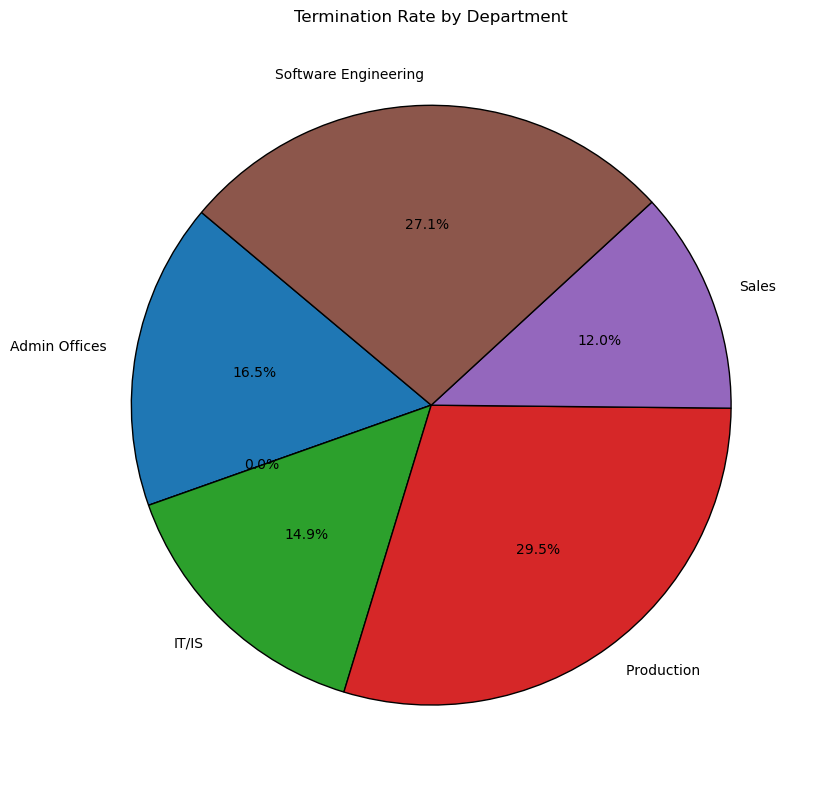

In [136]:
# Termination rates by department
termination_rates=hrdata.groupby('Department',observed=False)['Termd'].mean()

# Plotting the termination rate
plt.figure(figsize=(10, 8))
termination_rates.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Termination Rate by Department')
plt.ylabel('')  # Remove ylabel
plt.tight_layout()
plt.show()

**Key Insights:**

*High Termination Rates:*
- Production (0.397129): The Production department has the highest termination rate, with nearly 40% of employees being terminated. This is significantly higher than other departments.
> - This could be due to various factors such as high job demands, poor working conditions, lack of job satisfaction, or ineffective management practices. This high rate is a red flag and indicates the need for an in-depth analysis to identify and address the underlying causes.
- Software Engineering (0.363636): The Software Engineering department also has a high termination rate, with over 36% of employees being terminated.
> - suggests potential issues that need to be investigated. Factors could include job stress, work-life balance challenges, or misalignment between job expectations and reality.

*Moderate Termination Rates:*
- Admin Offices (0.222222): The Admin Offices have a moderate termination rate of about 22%.
- IT/IS (0.200000): The IT/IS department has a similar termination rate of 20%.
> - indicate a more stable environment, but there's still room for improvement. Understanding the reasons behind terminations in these departments can help reduce the rates further.

*Low Termination Rates:*
- Sales (0.161290): The Sales department has a relatively low termination rate of about 16%.
> - suggests that employees are generally more satisfied or better suited to their roles. This department could serve as a model for best practices in employee retention.
- Executive Office (0.000000): The Executive Office has the lowest termination rate, with no terminations reported.
> - The absence of terminations in the Executive Office might reflect a stable and well-managed environment. However, the small size of this department could also be a factor.

In [111]:
# Reasons for termination frequency
# Filter the data for terminated employees (Termd = 1)
terminated_data = hrdata[hrdata['Termd'] == 1]

# Calculate termination reason frequency by department
term_reason_counts = terminated_data.groupby(['Department', 'TermReason'], observed=False).size().unstack()
#term_reason_counts = term_reason_counts.fillna('-')
#term_reason_counts

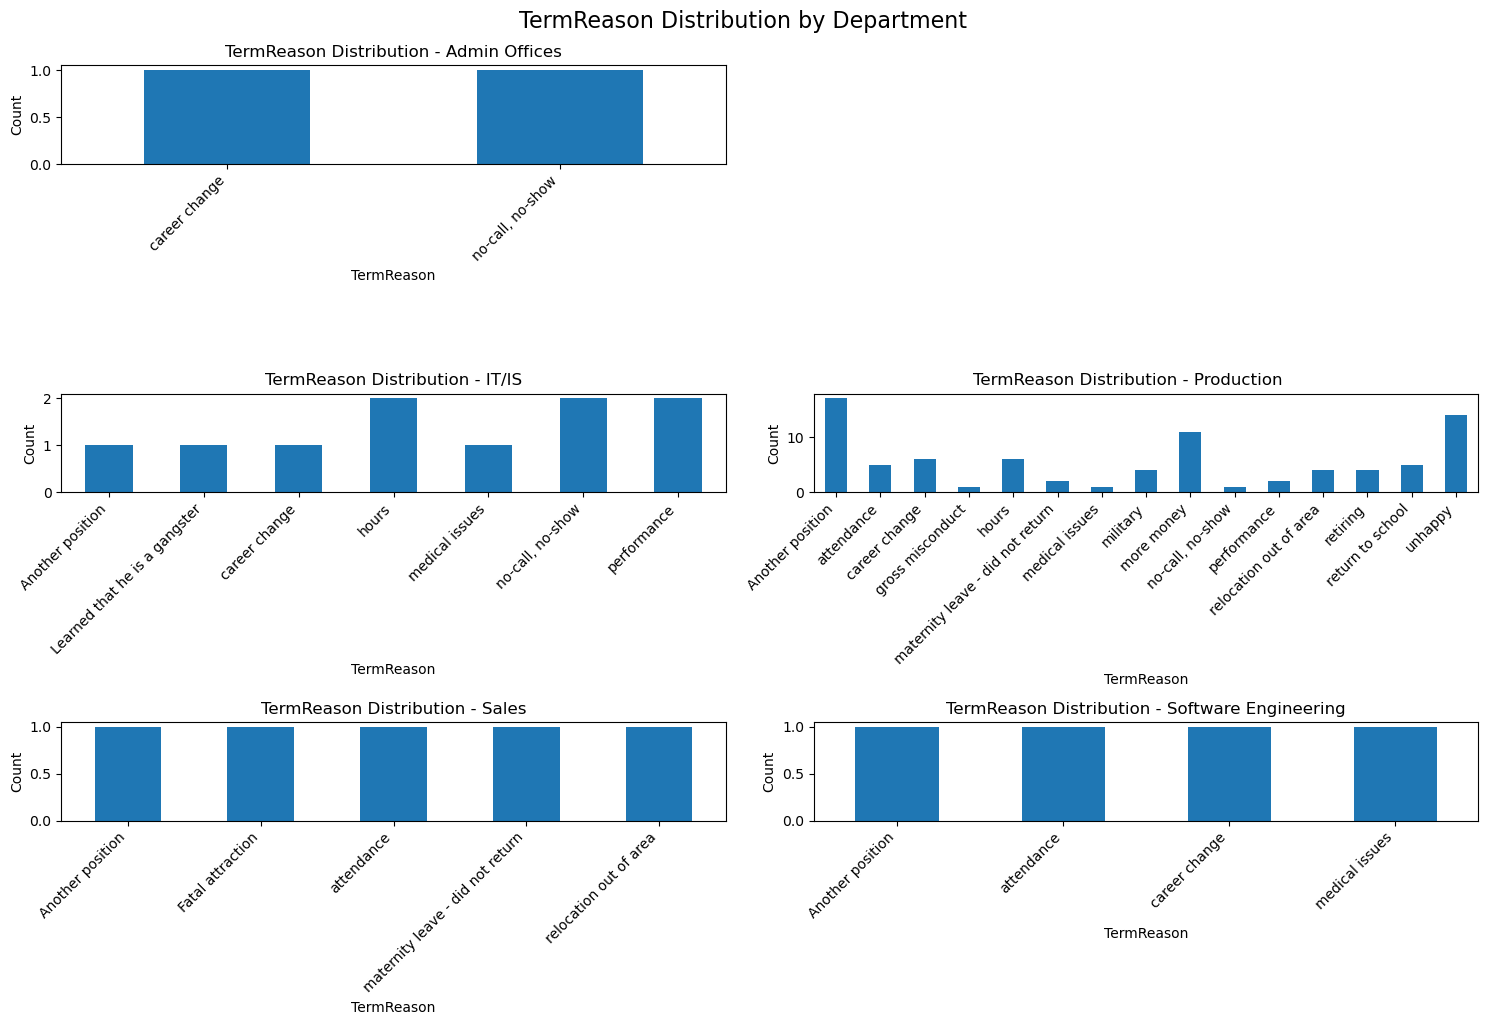

In [116]:
# Get list of departments
departments = term_reason_counts.index

# Plotting bar chart for each department
plt.figure(figsize=(15, 10))

# Iterate over departments
for i, department in enumerate(departments):
    department_data = term_reason_counts.loc[department]
    
    # Filter out departments with all zero counts
    if department_data[department_data != 0].empty:
        continue
    
    ax = plt.subplot(3, 2, i + 1)
    department_data[department_data != 0].plot(kind='bar', ax=ax)
    
    ax.set_title(f'TermReason Distribution - {department}')
    ax.set_xlabel('TermReason')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout and set super title
plt.tight_layout()
plt.suptitle('TermReason Distribution by Department', y=1.02, fontsize=16)
plt.show()

**Insights:**

*High Turnover in Production Department:*
- The production department has the highest number of terminations (79 instances in total), with the leading reasons being "Another position" (17 instances), "More money" (11 instances), and "Unhappiness" (14 instances).
> This suggests a need to address job satisfaction, compensation, and career opportunities in this department.

- Unhappiness in the Production Department:  With 14 instances of terminations due to "Unhappiness", there is a significant indication of job dissatisfaction within the production department. Understanding the root causes of this unhappiness could help mitigate turnover.

*IT/IS Department Challenges:*
- The IT/IS department has terminations for a variety of reasons, with notable instances being "Another position", "Learned that he is a gangster", "No-call, no-show", and "Performance issues".
> This indicates potential challenges in retention and employee screening processes.

*Retention Issues Related to Career and Compensation:*
- Across several departments, terminations due to seeking "Another position", "More money", and "Career change" are common.
> This highlights a potential need for better career development programs, competitive salaries, and engagement strategies.

*Limited Issues in Administrative and Executive Offices:*
- These departments show minimal to no terminations, suggesting stable environments. However, this could also be due to the smaller size of these departments.

**Recommendations:**
- Improve Job Satisfaction and Engagement: Focus on improving job satisfaction, especially in the Production department. Conduct employee surveys to understand specific grievances and address them proactively.
- Competitive Compensation Packages: Review and adjust compensation packages to ensure they are competitive within the industry, particularly for roles in high-turnover departments like Production and IT/IS.
- Career Development Opportunities: Implement robust career development and progression plans to retain employees seeking new positions or career changes.
- Enhance Screening and Onboarding Processes: Strengthen employee screening and onboarding processes, especially in departments with unique termination reasons such as IT/IS.
- Flexible Work Arrangements: Offer flexible work arrangements where possible, particularly in departments like IT/IS and Software Engineering, to improve work-life balance and reduce turnover.
- Address Specific Issues in the Production Department: Given the diverse reasons for termination in Production, conduct a detailed analysis to identify key areas for improvement, such as work environment, management practices, and employee well-being.

### Performance Analysis

In [117]:
# Performance score distribution
hrdata['PerformanceScore'].value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

In [118]:
# Correlation between performance score and salary
#hrdata[['PerfScoreID', 'Salary']].corr()

# Correlation between performance score and salary
contingency_table1 = pd.crosstab(hrdata['PerfScoreID'], [hrdata['Salary']])

# Perform chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table1)

# Interpret the results
if p < 0.05:
    print(f"There is a significant association between PerfScoreID and Salary. p-value = {p:.4f}")
else:
    print(f"There is no significant association between PerfScoreID and Salary. p-value = {p:.4f}")


There is no significant association between PerfScoreID and Salary. p-value = 0.5135


*This analysis suggests that variations in performance scores (PerfScoreID) do not significantly correlate with differences in salaries across the dataset. This finding could imply:*
- The majority of employees (243) are meeting expectations ("Fully Meets"), suggesting that the current performance evaluation criteria are generally effective in meeting organizational standards.
- The organization may have a salary structure that is independent of individual performance scores, possibly based on other factors such as job role, experience, or market competitiveness.
- While performance scores are important for feedback and development, they may not directly influence salary decisions in this context.

**Insight can be used to refine performance management strategies, including targeted training, mentoring, or coaching where needed while evaluating the salary structure and considering if adjustments are needed to better align with performance outcomes or to incentivize higher performance levels.**

### Engagement and Satisfaction Analysis

In [120]:
# Average engagement survey score by department
hrdata.groupby('Department',observed=False)['EngagementSurvey'].mean()

Department
Admin Offices           4.393333
Executive Office        4.830000
IT/IS                   4.154000
Production              4.129569
Sales                   3.818710
Software Engineering    4.061818
Name: EngagementSurvey, dtype: float64

In [121]:
# Factors influencing engagement
hrdata[['EngagementSurvey', 'Salary', 'PerfScoreID', 'SpecialProjectsCount']].corr()

,EngagementSurvey,Salary,PerfScoreID,SpecialProjectsCount
EngagementSurvey,1.000000,0.064966,0.544927,0.013227
Salary,0.064966,1.000000,0.130903,0.508333
PerfScoreID,0.544927,0.130903,1.000000,0.045677
SpecialProjectsCount,0.013227,0.508333,0.045677,1.000000


- The Executive Office has the highest average engagement score (4.830), indicating potentially strong leadership and organizational alignment at the executive level.
- Conversely, the Sales department has the lowest average engagement score (3.819), suggesting potential areas for improvement in employee satisfaction and organizational culture within the sales team.

- The engagement survey scores show a moderate positive correlation (r = 0.545) with performance scores suggesting that employees who perceive their performance positively tend to have higher engagement levels.
- Engagement scores show a weak correlation with salary (r = 0.065) and special projects count (r = 0.013) implying that while salary and involvement in special projects may contribute to employee satisfaction and motivation, they have limited impact on overall engagement levels as measured by the survey.

**Recommendation**
- Tailor engagement initiatives based on department-specific survey results. For example, focus on leadership development and team-building in departments with lower engagement scores like Sales.
- Strengthen performance management practices to provide regular feedback and recognition, potentially boosting engagement across departments.
- Consider a holistic approach to engagement that includes non-monetary incentives, career development opportunities, and fostering a positive work environment aligned with organizational values.

By leveraging these insights, the company can refine its strategies to enhance employee engagement, improve overall organizational performance, and foster a more motivated and satisfied workforce.

### Attendance and Punctuality Analysis

In [124]:
# Absences by department
hrdata.groupby('Department',observed=False)['Absences'].mean()

Department
Admin Offices            8.666667
Executive Office        10.000000
IT/IS                   10.440000
Production              10.143541
Sales                   11.548387
Software Engineering     8.727273
Name: Absences, dtype: float64

In [123]:
# Relationship between engagement and attendance
hrdata[['EngagementSurvey', 'Absences']].corr()

,EngagementSurvey,Absences
EngagementSurvey,1.000000,-0.008771
Absences,-0.008771,1.000000


In [126]:
# Factors influencing Attendance & Punctuality
hrdata[['EngagementSurvey', 'Salary', 'SpecialProjectsCount','EmpSatisfaction', 'Absences']].corr()

,EngagementSurvey,Salary,SpecialProjectsCount,EmpSatisfaction,Absences
EngagementSurvey,1.000000,0.064966,0.013227,0.187105,-0.008771
Salary,0.064966,1.000000,0.508333,0.062718,0.082382
SpecialProjectsCount,0.013227,0.508333,1.000000,0.033877,-0.020452
EmpSatisfaction,0.187105,0.062718,0.033877,1.000000,0.075222
Absences,-0.008771,0.082382,-0.020452,0.075222,1.000000


- Sales department has the highest average number of absences at 11.55 days, indicating potential issues  such as high job stress, lack of engagement, or other departmental challenges that need to be addressed to improve attendance.
- Unlike Admin Offices and Software Engineering, the lowest average absences at 8.67 and 8.73 days, respectively, might suggest better engagement, job satisfaction, or effective attendance policies in place.
  
**Factors Influencing Attendance:**
- Salary shows a weak positive correlation with absences and a moderate correlation with special projects, suggesting that financial incentives and involvement in projects are relevant but not strongly predictive of attendance.
- Engagement levels and special project involvement show minimal impact on absence rates, indicating other factors might be more significant in influencing attendance and punctuality.
- Employee satisfaction has a weak positive correlation with absences, suggesting that higher satisfaction might slightly correlate with more absences, which could be an area for further investigation to understand underlying reasons.

### Manager Performance Analysis

In [135]:
# Performance evaluation of managers and absentism
hrdata.groupby('ManagerID').agg(
    EmployeeCount=('EmpID', 'count'),
    AveragePerfScore=('PerfScoreID', 'mean'),
    AverageAbsceScore=('Absences', 'mean'))

,EmployeeCount,AveragePerfScore,AverageAbsceScore
ManagerID,,,
0.0,8,3.125000,9.125000
1.0,6,3.000000,8.500000
2.0,19,3.105263,10.210526
3.0,1,3.000000,4.000000
4.0,17,3.117647,9.470588
5.0,7,3.142857,9.285714
6.0,4,3.250000,9.000000
7.0,14,2.857143,10.571429
9.0,2,3.000000,6.500000


**Performance and Absence Correlation:**
-  ManagerID 17.0 and 30.0: Both managers have high average absence scores (13.36 and 16.00 days respectively) and relatively low performance scores (2.71 and 3.00 respectively) suggesting a potential correlation where higher absence rates may impact performance scores negatively.
-  ManagerID 6.0: Despite having the highest average performance score (3.25), the absence score is relatively moderate (9.00 days), indicating effective management practices that maintain performance without excessive absences
-  Several managers have an average performance score of exactly 3.0, indicating consistent performance evaluations and might be applying performance evaluation standards uniformly.  *However, it might be useful to review if this consistency reflects accurate performance assessments or if there's a tendency to avoid giving higher or lower scores.*
  
- It’s notable that managers with a higher number of employees (e.g., ManagerIDs 12.0, 16.0, and 18.0) have varying average performance scores. *Analyzing workload and its impact on management effectiveness could be beneficial.*
These managers have low average performance scores (2.818182 and 2.857143) with relatively high employee counts (22 and 21 employees respectively) and moderate to high absence scores (9.18 and 10.67 days respectively). *These managers might benefit from targeted support and training to address potential challenges in managing larger teams.*
- Managers with high average performance scores, such as ManagerID 6.0, could share best practices and management techniques that contribute to better employee performance. *Their absence scores are moderate (ranging from 9.00 to 9.29 days), indicating a balance between maintaining high performance and managing absences effectively. They could share best practices with other managers.*

- ManagerID 15.0 and 17.0 have low performance scores (2.666667 and 2.714286) and varying absence scores (8.67 and 13.36 days respectively). Focused interventions could help improve both performance and attendance in their teams.

- ManagerID 30.0: Despite managing only 1 employee, the high absence score (16.00 days) could indicate specific issues impacting both attendance and performance, which might need to be addressed individually.

## Recruitment Source Effectiveness

In [141]:
# Performance by recruitment source
hrdata.groupby('RecruitmentSource', observed=False).agg(
    AveragePerfScore=('PerfScoreID', 'mean'),
    AverageTermScore=('Termd', 'mean'))

,AveragePerfScore,AverageTermScore
RecruitmentSource,,
CareerBuilder,2.913043,0.478261
Diversity Job Fair,3.000000,0.551724
Employee Referral,3.161290,0.161290
Google Search,2.938776,0.612245
Indeed,2.954023,0.241379
LinkedIn,3.000000,0.236842
On-line Web application,3.000000,1.000000
Other,3.000000,0.500000
Website,2.769231,0.076923


**Insights:**

*Employee Referral Program Effectiveness:*
- Employees referred by existing staff have the highest average performance scores and one of the lowest termination rates, indicating that referrals are a reliable source of high-performing, stable employees.

*Online Web Applications:*
- Although employees hired through on-line web applications have an average performance score of 3.000000, the termination rate is extremely high (1.000000). This suggests potential issues with the recruitment process or the suitability of candidates hired through this source.
  
*Performance vs. Termination Rate Correlation:*
- Google Search and CareerBuilder: Both sources have moderate average performance scores and relatively high termination rates, suggesting these sources might attract candidates who are less likely to remain with the company long-term.

*Website Hires:*
- While employees hired through the company's website have the lowest average performance scores, they also have the lowest termination rate, suggesting these hires are more stable but might need additional support to enhance performance.
  
**Recommendations:**
- Enhance Employee Referral Program: Given the high performance and low termination rates of referred employees, expand and incentivize the employee referral program. Encourage employees to refer high-quality candidates and consider offering additional rewards for successful hires.
- Review and Improve Online Application Process:Investigate the high termination rate for employees hired through on-line web applications. Assess the screening and evaluation process for these applicants and consider enhancing pre-employment assessments to ensure a better fit for the company.
- Targeted Training and Support:Provide targeted training and development programs for employees hired through sources with lower performance scores, such as Website hires. This can help improve their performance and ensure they contribute effectively to the organization.
- Diversify Recruitment Channels:Continue leveraging high-performing recruitment sources like Employee Referral and LinkedIn, but also explore and test other recruitment channels to ensure a diverse and high-quality talent pool.
- Monitor and Adjust Recruitment Strategies:Regularly monitor the performance and retention rates of employees hired from different sources. Use this data to continually refine and optimize recruitment strategies, focusing on sources that yield the best combination of high performance and low turnover.

### Special Projects Impact

In [142]:
# Impact on engagement, performance score and satisfaction
hrdata[['SpecialProjectsCount', 'PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction']].corr()

,SpecialProjectsCount,PerfScoreID,EngagementSurvey,EmpSatisfaction
SpecialProjectsCount,1.000000,0.045677,0.013227,0.033877
PerfScoreID,0.045677,1.000000,0.544927,0.303579
EngagementSurvey,0.013227,0.544927,1.000000,0.187105
EmpSatisfaction,0.033877,0.303579,0.187105,1.000000


**Key Insights:**

*Special Projects and Performance:*
- Low Correlation (0.045677): The number of special projects assigned to employees has a very weak positive correlation with performance scores. This indicates that simply assigning more projects does not significantly impact performance scores.
*Performance and Engagement:*
-  Moderate Correlation (0.544927): There is a moderate positive correlation between performance scores and engagement survey scores. Higher engagement levels are associated with better performance, suggesting that engaged employees tend to perform better.
*Performance and Employee Satisfaction:*
- Moderate Correlation (0.303579): There is a moderate positive correlation between performance scores and employee satisfaction. Employees who are more satisfied with their job tend to have higher performance scores.
*Engagement and Satisfaction:*
- Weak Correlation (0.187105): There is a weak positive correlation between engagement survey scores and employee satisfaction. While related, engagement and satisfaction do not strongly influence each other, indicating that they are somewhat independent factors.
*Special Projects and Other Factors:*
- Very Low Correlations: The number of special projects shows very low correlations with engagement survey scores (0.013227) and employee satisfaction (0.033877). This suggests that assigning special projects does not significantly impact engagement or satisfaction.

**Recommendations:**
- Enhance Employee Engagement: 
Since engagement has a moderate positive correlation with performance, focus on initiatives that boost employee engagement. This could include recognition programs, career development opportunities, and a positive work environment.
- Increase Job Satisfaction: Given the moderate correlation between satisfaction and performance, consider strategies to improve job satisfaction. This could involve offering competitive benefits, fostering a supportive work culture, and providing opportunities for growth and advancement.
- Balanced Workload for Special Projects: Since the number of special projects does not significantly impact performance, engagement, or satisfaction, ensure that special project assignments are balanced and do not overwhelm employees. Focus on the quality of projects rather than quantity.
- Holistic Approach to Performance Management:Address both engagement and satisfaction to improve performance. Tailor interventions to address the unique needs of employees and departments. This holistic approach can lead to sustained performance improvements.
- Monitor and Adjust Strategies: Regularly assess the impact of engagement and satisfaction initiatives on performance. Use employee feedback to continuously refine strategies and ensure they are effective.
By focusing on enhancing engagement and satisfaction while balancing special project assignments, the organization can improve overall employee performance and well-being.

### Age and Tenure Analysis

In [144]:
# Age distribution by department
hrdata.groupby('DeptID')['DOB'].apply(lambda x: 2024 - pd.to_datetime(x).dt.year).describe()

count    311.000000
mean      45.408360
std        8.870236
min       32.000000
25%       38.000000
50%       44.000000
75%       51.000000
max       73.000000
Name: DOB, dtype: float64

**Key Observations:**

*Age Range and Diversity:*
- The ages of employees range widely from 32 to 73 years, indicating a diverse age group within the organization.
The mean age of 45.41 suggests a mature workforce with substantial experience.
*Quartile Analysis:*
- 25th Percentile (Q1): 25% of employees are younger than 38 years.
- 50th Percentile (Median): The median age is 44 years, meaning half of the employees are younger and half are older.
- 75th Percentile (Q3): 25% of employees are older than 51 years.
*Standard Deviation:*
- A standard deviation of 8.87 years indicates moderate variability in the ages of employees, reflecting a balance between younger and older employees.
*Extremes:*
- The minimum age of 32 years shows the presence of relatively younger employees, potentially in entry-level or early career positions.
- The maximum age of 73 years reflects a small number of employees who are likely very experienced or in senior roles.

*Departmental Age Distribution:*
- While the overall statistics provide a high-level view, analyzing age distribution by department would reveal more specific insights regarding age diversity in different areas of the organization.

**Recommendations:**
- Succession Planning: Given the mature workforce, implement robust succession planning to ensure knowledge transfer and prepare for retirements, particularly for employees approaching the upper age limit.
- Training and Development: Develop tailored training programs to meet the needs of different age groups. Younger employees may benefit from skill-building and career advancement programs, while older employees might prefer opportunities for leadership development and mentoring roles.
- Workforce Balance: Maintain a balanced age distribution across departments to foster innovation and stability. Encourage intergenerational collaboration to leverage the strengths of both younger and more experienced employees.
- Health and Wellness Programs:Offer health and wellness programs that cater to a diverse age range. This could include fitness programs, mental health support, and ergonomic assessments to ensure a healthy and productive workforce.
- Retention Strategies:Create retention strategies that address the unique needs of different age groups. Younger employees might value career growth opportunities, while older employees may prioritize job security and retirement planning support.

In [145]:
# Relationship between tenure and performance
hrdata['Tenure'] = hrdata['DateofHire'].apply(lambda x: 2024 - pd.to_datetime(x).year)
hrdata[['Tenure', 'PerfScoreID']].corr()

,Tenure,PerfScoreID
Tenure,1.000000,0.039831
PerfScoreID,0.039831,1.000000


**Key Insights:**

*Weak Correlation:*
- The correlation between tenure and performance score is 0.039831, which indicates a very weak positive relationship. This suggests that the length of time an employee has been with the company has little to no impact on their performance score.
- Implications of Weak Correlation: Employees who have been with the company for a longer period do not necessarily perform better or worse than those with shorter tenures. Performance is relatively independent of how long employees have been employed at the company.

**Recommendations:**
- Focus on Individual Development: Since tenure does not significantly impact performance, focus on individual development plans and continuous performance management. Tailor development programs to meet the unique needs of each employee regardless of their tenure.
- Regular Performance Reviews: Implement regular performance reviews to provide ongoing feedback and support. This will help identify areas of improvement and recognize high performers irrespective of their tenure.
- Mentorship Programs: Pair experienced employees with newer ones through mentorship programs. While tenure does not directly impact performance, experienced employees can share valuable insights and best practices that contribute to overall team performance.
- Performance-Based Incentives: Consider performance-based incentives rather than tenure-based rewards. Recognize and reward employees based on their contributions and achievements to encourage high performance across all tenure levels.
- Continuous Learning Opportunities: Offer continuous learning and development opportunities to all employees. Encourage skill development and career growth to enhance performance, keeping employees engaged and motivated.